In [1]:
import pandas as pd
import os
import jive
import nibabel as nb
from glob import glob
from os.path import join
import nibabel as nb
import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)

In [2]:
home = '/Users/lucindasisk/Box/LS_Folders/CMI_ABCD'
subids = pd.read_csv(home + '/pheno_data_sublist.csv', header=None).iloc[:,1]
pheno_data = pd.read_csv(home + '/phenoData_analysis_08062019.csv', index_col='subjectkey')
gifti_data = join(home, 'ABCD_metrics')

### Import and Clean Data

In [3]:
#Create empty list for data
all_sub_data=[]
def load_data_area(sublist, home_path):
    for i in range(0, len(sublist)):
        sub = sublist.loc[i]
        #print(sub)
        #Area data - Left func
        area_imgL = nb.load(join(gifti_data, 'area/{}.L.area.10k_fs_LR_sm_10.func.gii'.format(sub)))     
        area_img_dataL = [x.data for x in area_imgL.darrays]
        area_cur_dataL = np.reshape(area_img_dataL,(len(area_img_dataL[0]),len(area_img_dataL)))
        
        #Area data - Right func
        area_imgR = nb.load(join(gifti_data, 'area/{}.R.area.10k_fs_LR_sm_10.func.gii'.format(sub)))     
        area_img_dataR = [x.data for x in area_imgR.darrays]
        area_cur_dataR = np.reshape(area_img_dataR,(len(area_img_dataR[0]),len(area_img_dataR)))
        
        #Thickness data - Left
        thickness_imgL2 = nb.load(join(gifti_data, 'thickness/{}.L.thickness.10k_fs_LR_sm_10.shape.gii'.format(sub)))     
        thickness_img_dataL2 = [x.data for x in thickness_imgL2.darrays]
        thickness_cur_dataL2 = np.reshape(thickness_img_dataL2,(len(thickness_img_dataL2[0]),len(thickness_img_dataL2)))
        
        #Thickness data Right 2
        thickness_imgR2 = nb.load(join(gifti_data, 'thickness/{}.R.thickness.10k_fs_LR_sm_10.shape.gii'.format(sub)))     
        thickness_img_dataR2 = [x.data for x in thickness_imgR2.darrays]
        thickness_cur_dataR2 = np.reshape(thickness_img_dataR2,(len(thickness_img_dataR2[0]),len(thickness_img_dataR2)))
        
        #Myelin Map data Left (2)
        myelin_imgL2 = nb.load(join(gifti_data, 'MyelinMap/{}.L.MyelinMap.10k_fs_LR_sm_10.func.gii'.format(sub)))     
        myelin_img_dataL2 = [x.data for x in myelin_imgL2.darrays]
        myelin_cur_dataL2 = np.reshape(myelin_img_dataL2,(len(myelin_img_dataL2[0]),len(myelin_img_dataL2)))
        
        #Myelin Map data Right(2)
        myelin_imgR2 = nb.load(join(gifti_data, 'MyelinMap/{}.R.MyelinMap.10k_fs_LR_sm_10.func.gii'.format(sub)))     
        myelin_img_dataR2 = [x.data for x in myelin_imgR2.darrays]
        myelin_cur_dataR2 = np.reshape(myelin_img_dataR2,(len(myelin_img_dataR2[0]),len(myelin_img_dataR2)))

        #Append data
        a1 = np.append(area_cur_dataL, area_cur_dataR, axis=0)
        a2 = np.append(thickness_cur_dataL2, thickness_cur_dataR2, axis=0)
        a3 = np.append(myelin_cur_dataL2, myelin_cur_dataR2, axis=0)
        a4 = np.append(a1, a2, axis=0)
        a5 = np.append(a4, a3, axis=0)
        
        appended_data = a5
        
        #Append to external data list
        all_sub_data.append(appended_data)
        
    

In [4]:
#Run function, read in data from all subjects
## Set subids to only 5 to reduce time
#subids = subids.loc[0:199]

load_data_area(subids, home)

In [5]:
#Clean and reshape data
reshaped = np.asarray(all_sub_data, order='C')#Convert list to array
#np.nan_to_num(reshaped, copy=False) #Replace NANs with 0
nothird = reshaped[:, :, 0] #Get rid of third axis from list
brain_arr = nothird 
#area_array = np.array(data_dict_area)

In [15]:
brain_arr_mean = np.mean(brain_arr)
brain_arr_mean

2.165933

In [18]:
#Strip site text from site; convert to categorical (factor)
pheno_data['site_id_fac'] = pheno_data

sex  interview_age site_id_l  cbcl_scr_syn_anxdep_t  \
subjectkey                                                            
NDARINV03CV8RDT   M            128    site09                     62   
NDARINV08K0R9C4   M            127    site11                     50   
NDARINV0BXXNBH4   M            126    site16                     78   
NDARINV0CCVJ39W   M            129    site16                     51   
NDARINV0CKA3YZX   M            124    site11                     50   
...              ..            ...       ...                    ...   
NDARINVZMMCVRWG   M            120    site16                     69   
NDARINVZN9E45NT   F            129    site15                     65   
NDARINVZR9NMJBR   M            110    site02                     53   
NDARINVZYB94X1J   M            110    site21                     50   
NDARINVZZLZCKAY   F            110    site06                     65   

                 cbcl_scr_syn_withdep_t  cbcl_scr_syn_somatic_t  \
subjectkey                                                        
NDARINV03CV8RDT                      50                      50   
NDARINV08K0R9C4                      50                      57   
NDARINV0BXXNBH4                      62                      57   
NDARINV0CCVJ39W                      50                      53   
NDARINV0CKA3YZX                      54                      50   
...                                 ...                     ...   
NDARINVZMMCVRWG                      54                      50   
NDARINVZN9E45NT                      66                      64   
NDARINVZR9NMJBR                      50                      50   
NDARINVZYB94X1J                      50                      50   
NDARINVZZLZCKAY                      68                      64   

                 cbcl_scr_syn_social_t  cbcl_scr_syn_thought_t  \
subjectkey                                                       
NDARINV03CV8RDT                     50                      50   
NDARINV08K0R9C4                     50                      50   
NDARINV0BXXNBH4                     53                      54   
NDARINV0CCVJ39W                     50                      54   
NDARINV0CKA3YZX                     53                      54   
...                                ...                     ...   
NDARINVZMMCVRWG                     78                      64   
NDARINVZN9E45NT                     62                      74   
NDARINVZR9NMJBR                     50                      51   
NDARINVZYB94X1J                     51                      54   
NDARINVZZLZCKAY                     57                      62   

                 cbcl_scr_syn_attention_t  cbcl_scr_syn_rulebreak_t  ...  \
subjectkey                                                           ...   
NDARINV03CV8RDT                        52                        50  ...   
NDARINV08K0R9C4                        50                        50  ...   
NDARINV0BXXNBH4                        51                        50  ...   
NDARINV0CCVJ39W                        50                        50  ...   
NDARINV0CKA3YZX                        55                        51  ...   
...                                   ...                       ...  ...   
NDARINVZMMCVRWG                        61                        57  ...   
NDARINVZN9E45NT                        68                        74  ...   
NDARINVZR9NMJBR                        51                        53  ...   
NDARINVZYB94X1J                        50                        50  ...   
NDARINVZZLZCKAY                        64                        55  ...   

                 nsc_p_ss_mean_3_items  fes_p_ss_fc  pmq_y_ss_mean  \
subjectkey                                                           
NDARINV03CV8RDT               3.666667            0            4.8   
NDARINV08K0R9C4               5.000000            0            4.8   
NDARINV0BXXNBH4               4.000000            1            4.4   
NDARINV0CCVJ39W       

In [17]:
pheno_clean = pheno_data.drop('site_id_l', axis=1).iloc[0:447,0:49].replace(np.nan, 0)
pheno_clean['sex'] = pheno_clean['sex'].replace('F', 1).replace('M', 0).astype('category') # Recode sex
#### REPLACED NAN WITH 0 - CHECK THIS

## Mean Center Data

## Convert to array
pheno_arr = np.asarray(pheno_clean, order='C', dtype=float)


### Jive Analysis
Example from https://pypi.org/project/jive/
See also AJIVE paper: https://www.sciencedirect.com/science/article/pii/S0047259X1730204X

In [7]:
from jive.AJIVE import AJIVE
from jive.PCA import PCA
from jive.ajive_fig2 import generate_data_ajive_fig2
from jive.viz.block_visualization import data_block_heatmaps, jive_full_estimate_heatmaps
import matplotlib.pyplot as plt
# %matplotlib inline

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
X, Y = brain_arr, pheno_arr
#X, Y = generate_data_ajive_fig2()
print(X.shape, Y.shape)
data_block_heatmaps([X, Y])

(447, 61452) (447, 48)


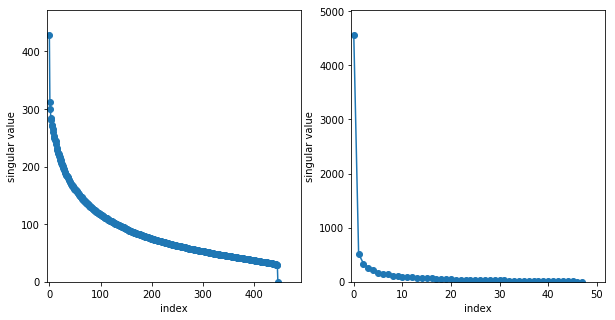

In [9]:
# determine initial signal ranks by inspecting scree plots
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
PCA().fit(X).plot_scree()
plt.subplot(1, 2, 2)
PCA().fit(Y).plot_scree()

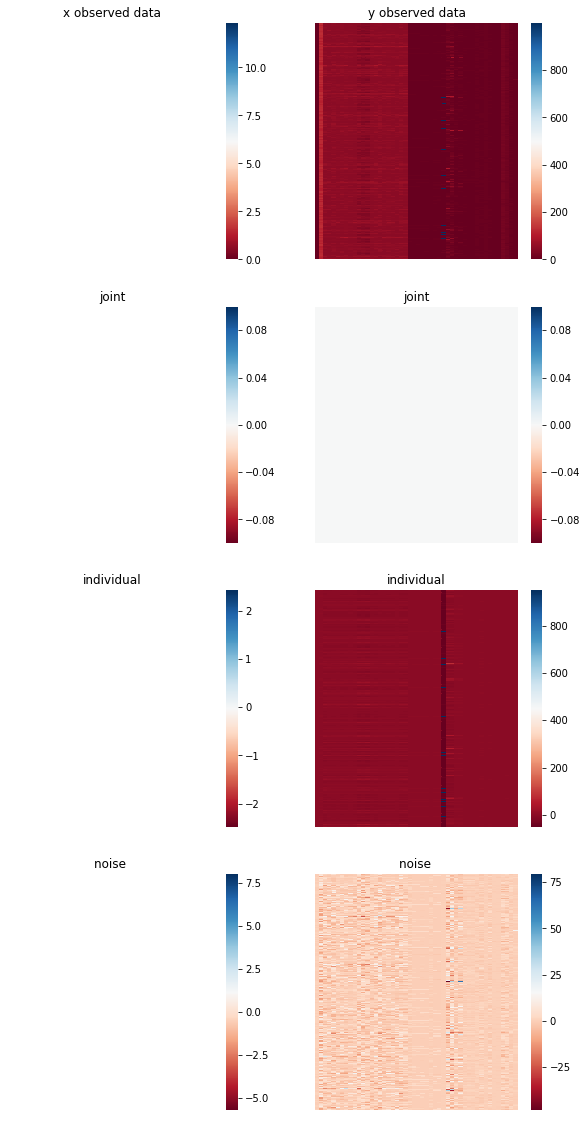

In [10]:
ajive = AJIVE(init_signal_ranks={'x': 2, 'y': 3})
ajive.fit(blocks={'x': X, 'y': Y})

plt.figure(figsize=[10, 20])
jive_full_estimate_heatmaps(ajive.get_full_block_estimates(),
                            blocks={'x': X, 'y': Y})

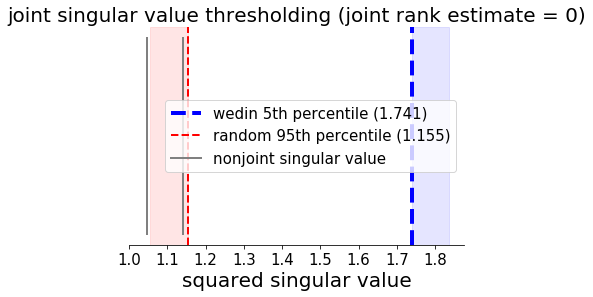

In [11]:
ajive.plot_joint_diagnostic()